In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [46]:
training_data=pd.read_csv('Resources/train_cleaned.csv')
training_data.head()

,ID,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_History_Age_Months
0,0x1608,19114.12,1824.843333,3,4,3,4,3,8,4.0,Good,809.98,22.537593,No,49.574949,178.344067,244.565317,Good,271
1,0x160f,34847.84,3037.986667,2,4,6,1,7,1,2.0,Good,605.03,38.550848,No,18.816215,40.391238,484.591214,Good,320
2,0x1612,34847.84,3037.986667,2,4,6,1,3,1,2.0,Good,605.03,34.977895,No,18.816215,130.115420,444.867032,Good,323
3,0x1613,34847.84,3037.986667,2,4,6,1,3,0,2.0,Good,605.03,33.381010,No,18.816215,43.477190,481.505262,Good,324
4,0x1615,34847.84,3037.986667,2,4,6,1,3,4,2.0,Good,605.03,32.933856,No,18.816215,218.904344,356.078109,Good,326


In [47]:
training_data_without_outliers=pd.read_csv('Resources/train_cleaned_without_outliers.csv')
training_data_without_outliers.head()

,ID,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_History_Age_Months
0,0x1608,19114.12,1824.843333,3,4,3,4,3,8,4.0,Good,809.98,22.537593,No,49.574949,178.344067,244.565317,Good,271
1,0x160f,34847.84,3037.986667,2,4,6,1,7,1,2.0,Good,605.03,38.550848,No,18.816215,40.391238,484.591214,Good,320
2,0x1612,34847.84,3037.986667,2,4,6,1,3,1,2.0,Good,605.03,34.977895,No,18.816215,130.115420,444.867032,Good,323
3,0x1613,34847.84,3037.986667,2,4,6,1,3,0,2.0,Good,605.03,33.381010,No,18.816215,43.477190,481.505262,Good,324
4,0x1615,34847.84,3037.986667,2,4,6,1,3,4,2.0,Good,605.03,32.933856,No,18.816215,218.904344,356.078109,Good,326


In [48]:
training_data.shape

(33705, 19)

In [49]:
training_data_without_outliers.shape

(31801, 19)

In [50]:
data = training_data.drop(columns=['ID', 'Credit_Score', 'Credit_Mix', 'Payment_of_Min_Amount'])
target = training_data[['Credit_Score']].values.ravel()
column_names = data.columns.tolist()

In [51]:
data_wo = training_data_without_outliers.drop(columns=['ID', 'Credit_Score', 'Credit_Mix', 'Payment_of_Min_Amount'])
target_wo = training_data_without_outliers[['Credit_Score']].values.ravel()
column_names = data.columns.tolist()

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    data, target, random_state=0)

In [53]:
X_train_wo, X_test_wo, y_train_wo, y_test_wo = train_test_split(
    data_wo, target_wo, random_state=0)

In [54]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), column_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

In [55]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.663


In [94]:
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [95]:
print(accuracy)

0.6634626794826154


In [96]:
print(conf_matrix)

[[ 774   73  504]
 [  89 1711  779]
 [ 593  798 3106]]


In [97]:
print(class_report)

              precision    recall  f1-score   support

        Good       0.53      0.57      0.55      1351
        Poor       0.66      0.66      0.66      2579
    Standard       0.71      0.69      0.70      4497

    accuracy                           0.66      8427
   macro avg       0.63      0.64      0.64      8427
weighted avg       0.67      0.66      0.66      8427



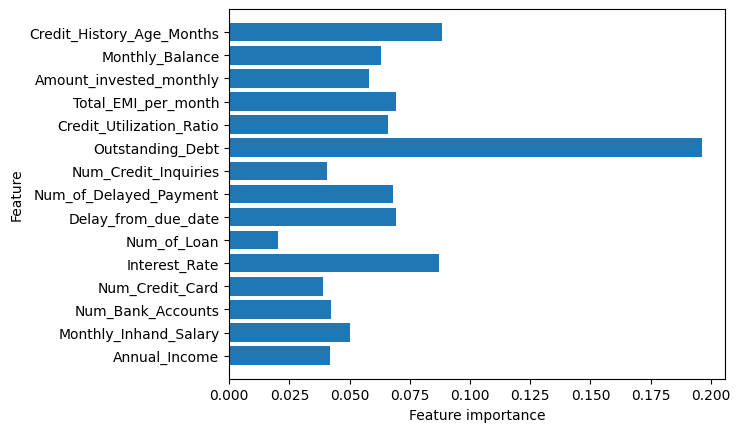

In [56]:
plot_feature_importances(tree)

In [57]:
tree_wo = DecisionTreeClassifier(random_state=0)
tree_wo.fit(X_train_wo, y_train_wo)

print("Accuracy on training set without outliers: {:.3f}".format(tree_wo.score(X_train_wo, y_train_wo)))
print("Accuracy on test set without outliers: {:.3f}".format(tree_wo.score(X_test_wo, y_test_wo)))

Accuracy on training set without outliers: 1.000
Accuracy on test set without outliers: 0.654


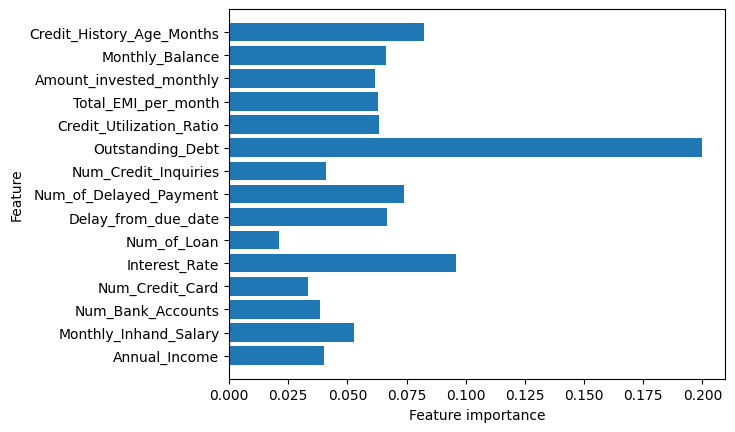

In [58]:
plot_feature_importances(tree_wo)

In [59]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.758


In [98]:
y_pred = forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [100]:
print(accuracy)
print(conf_matrix)
print(class_report)

0.757683635932123
[[ 827   13  511]
 [  43 1955  581]
 [ 337  557 3603]]
              precision    recall  f1-score   support

        Good       0.69      0.61      0.65      1351
        Poor       0.77      0.76      0.77      2579
    Standard       0.77      0.80      0.78      4497

    accuracy                           0.76      8427
   macro avg       0.74      0.72      0.73      8427
weighted avg       0.76      0.76      0.76      8427



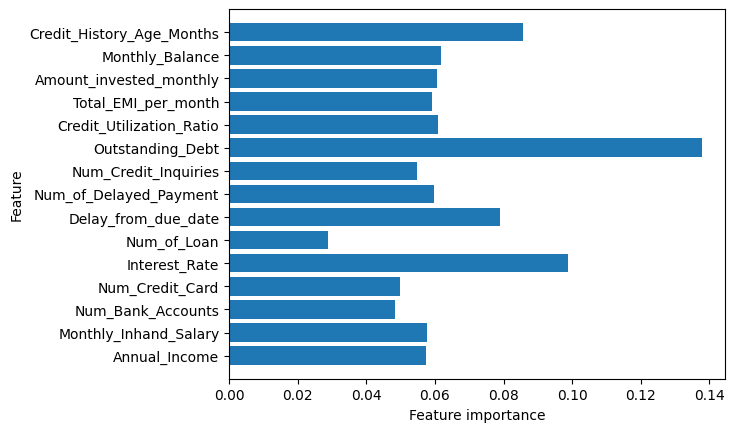

In [60]:
plot_feature_importances(forest)

In [103]:
# Define the parameter grid
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'n_estimators': [50, 100, 200]
}

# Initialize Random Forest
rf = RandomForestClassifier()

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [104]:
forest = RandomForestClassifier(
    n_estimators=200,          # Best value found
    max_depth=30,              # Best value found
    max_features='sqrt',       # Best value found
    min_samples_leaf=1,        # Best value found
    min_samples_split=2,       # Best value found
    bootstrap=False,           # Best value found
    random_state=0
)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.765


In [61]:
forest_wo = RandomForestClassifier(n_estimators=100, random_state=0)
forest_wo.fit(X_train_wo, y_train_wo)

print("Accuracy on training set: {:.3f}".format(forest_wo.score(X_train_wo, y_train_wo)))
print("Accuracy on test set: {:.3f}".format(forest_wo.score(X_test_wo, y_test_wo)))

Accuracy on training set: 1.000
Accuracy on test set: 0.750


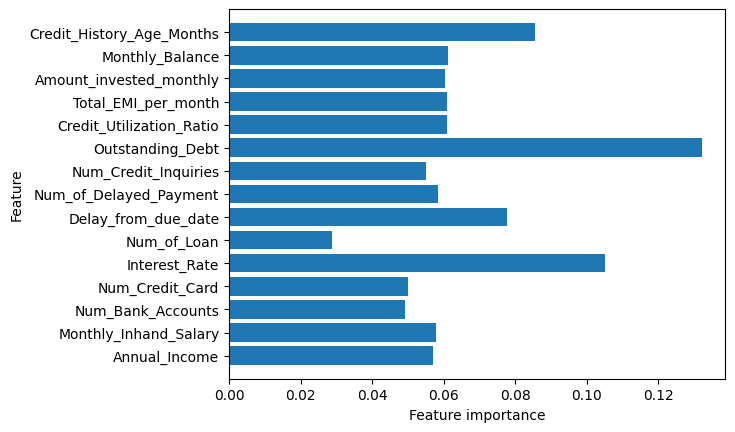

In [62]:
plot_feature_importances(forest_wo)

In [65]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.703
Accuracy on test set: 0.692


In [67]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train_wo, y_train_wo)

print("Accuracy on training set without outliers: {:.3f}".format(gbrt.score(X_train_wo, y_train_wo)))
print("Accuracy on test set without outliers: {:.3f}".format(gbrt.score(X_test_wo, y_test_wo)))

Accuracy on training set: 0.705
Accuracy on test set: 0.684


In [72]:
param_grid = {
    'max_depth': [1, 3, 5],  # Test varying tree depths
    'learning_rate': [0.01, 0.1, 0.2],  # Test different learning rates
    'n_estimators': [50, 100, 200]  # (Optional) Test varying numbers of estimators
}


In [70]:
from sklearn.model_selection import GridSearchCV
gb = GradientBoostingClassifier()
# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    scoring='accuracy',  # Or another metric like 'roc_auc' or 'f1'
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available cores
    verbose=1
)

# Fit to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Best Score: 0.70875839656187


In [73]:
param_grid2 = {
    'max_depth': [3, 5, 7],  # Test varying tree depths
    'learning_rate': [0.1, 0.3, 0.5],  # Test different learning rates
    'n_estimators': [100, 300, 500]  # (Optional) Test varying numbers of estimators
}

In [75]:
from sklearn.model_selection import GridSearchCV
gb = GradientBoostingClassifier()
# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid2,
    scoring='accuracy',  # Or another metric like 'roc_auc' or 'f1'
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available cores
    verbose=1
)

# Fit to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 300}
Best Score: 0.7297249245639735


In [76]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.3, max_depth=7, n_estimators=300)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.749


In [101]:
y_pred = gbrt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [102]:
print(accuracy)
print(conf_matrix)
print(class_report)

0.749495668683992
[[ 861    8  482]
 [  31 1866  682]
 [ 343  565 3589]]
              precision    recall  f1-score   support

        Good       0.70      0.64      0.67      1351
        Poor       0.77      0.72      0.74      2579
    Standard       0.76      0.80      0.78      4497

    accuracy                           0.75      8427
   macro avg       0.74      0.72      0.73      8427
weighted avg       0.75      0.75      0.75      8427

